# เล่น tfex วันไหนดี?

In [89]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [79]:
df = tv.get_hist(symbol='set',exchange='set',interval=Interval.in_daily,n_bars=1000)
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')

df.tail(5)

symbol       open     high      low      close  \
datetime                                                               
2022-01-27 09:00:00  set:set  1633.7800  1635.14  1617.87  1634.1700   
2022-01-28 09:00:00  set:set  1637.8199  1646.48  1636.70  1639.5100   
2022-01-31 09:00:00  set:set  1647.6801  1655.48  1646.88  1648.8101   
2022-02-01 09:00:00  set:set  1659.4301  1663.76  1658.26  1661.7500   
2022-02-02 09:00:00  set:set  1665.8000  1669.50  1658.58  1667.7500   

                            volume       Date  
datetime                                       
2022-01-27 09:00:00  1.000000e+100 2022-01-27  
2022-01-28 09:00:00  1.000000e+100 2022-01-28  
2022-01-31 09:00:00  1.000000e+100 2022-01-31  
2022-02-01 09:00:00  1.000000e+100 2022-02-01  
2022-02-02 09:00:00  1.000000e+100 2022-02-02

<AxesSubplot:xlabel='datetime'>

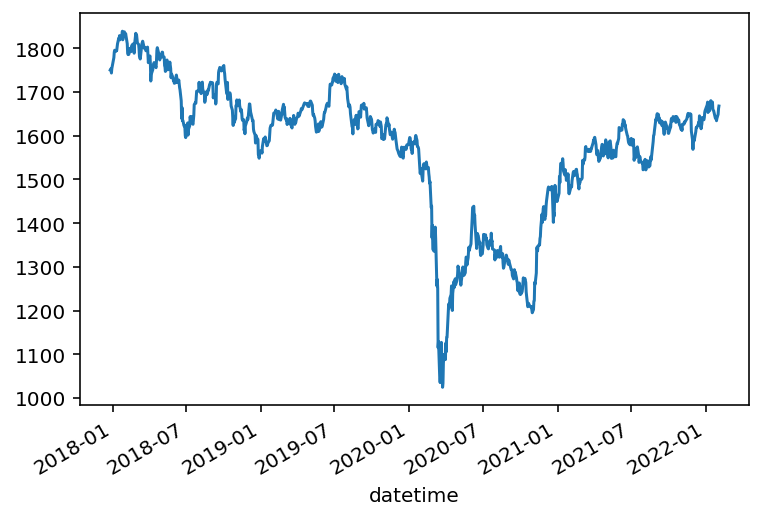

In [90]:
df['close'].plot()

In [81]:
df['dayofweek'] = df.index.dayofweek

In [82]:
df['pct_change'] = df['close'].pct_change()

In [91]:
df.groupby('dayofweek')['pct_change'].mean().sort_values()

dayofweek
0   -0.002220
3   -0.000598
4    0.000384
2    0.000478
1    0.001906
Name: pct_change, dtype: float64

In [85]:
import datetime as dt
df['weekday'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%A'))

In [88]:
df[df.index>'2020-12-31'].groupby('weekday')['pct_change'].mean().sort_values()

weekday
Friday      -0.000902
Thursday    -0.000210
Monday       0.000262
Wednesday    0.000458
Tuesday      0.003069
Name: pct_change, dtype: float64

In [95]:
k1 = df[df.index>'2020-12-31'].groupby('weekday').size()
k1

weekday
Friday       50
Monday       53
Thursday     53
Tuesday      54
Wednesday    53
dtype: int64

In [96]:
k2 = df[(df.index>'2020-12-31') & (df['pct_change']<0)].groupby('weekday').size()
k2

weekday
Friday       30
Monday       26
Thursday     24
Tuesday      16
Wednesday    26
dtype: int64

In [100]:
#จากวันอังคารทั้งสิ้น 54 วันนับจากปี 2021 มีเพียง 16 วันอังคารเท่านั้นที่ให้ผลตอบแทนติดลบ
#คิดเป็น 29% ที่ตลาดแดง

In [97]:
k2/k1

weekday
Friday       0.600000
Monday       0.490566
Thursday     0.452830
Tuesday      0.296296
Wednesday    0.490566
dtype: float64